## Notebook Chronotyoe
### Trabajo base de datos neo4j


## Funciones

In [69]:
from scipy.signal import butter,filtfilt

def sgn(x):
    if x!= 0:
        return x/(abs(x))
    else:
        return 1
def neo4jdate2number(neo4jdate_object):
    n = neo4jdate_object
    
    div = 3600
    

    taim =  float(n.day)*24*3600 + float(n.hour) * 3600 +  float(n.minute) * 60 +  float(n.second)
    #new_taim = taim - desfase_12 
    #taim = new_taim
    taim = taim/div
    return taim

def correct_data(df):
    df_ = df.reset_index()
    df__ = df_.copy()
    #dia_0 = df['timestamp'].iloc[0].day * 24
    set0 = df__[['participant', 'timestamp']].groupby(['participant']).min().reset_index()
    df_['timestamp'] = df_['timestamp'].apply(neo4jdate2number)
    set0['timestamp'] = set0['timestamp'].apply(lambda x: x.day * 24)
    return df_,set0

def normalize(df):
    normalized_df = (df-df.min())/(df.max()-df.min())
    return normalized_df


def filter(signal, t_ini, t_ini_1, t_fin, cutoff_ = 2):

    # Filter requirements.
    Ts = (t_ini_1-t_ini)*3600
    T = (t_fin - t_ini)*3600         # Sample Period
    fs = 1/Ts       # sample rate, Hz
    cutoff = cutoff_      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
    nyq = 0.5 * fs  # Nyquist Frequency
    order = 2       # sin wave can be approx represented as quadratic
    n = int(T * fs) # total number of samples
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, signal)
    return y

def plot2geder(time1, time2, data1, data2, nombre1, nombre2,set0_1 = 0, set0_2 = 0, norm = False, scatter = 0):
    #time1 = time1 - time1.iloc[0]
    #time2 = time2 - time2.iloc[0]
    time_1 = time1 - set0_1
    time_2 = time2 - set0_2
    time_min = min(time_1.iloc[-1], time_2.iloc[-1])
    print(time_min)
    time_1 = time_1[time_1 < time_min]
    lentime1 = len(time_1)
    time_2 = time_2[time_2 < time_min]
    lentime2 = len(time_2)



    
    

    if norm:
        data_1 = normalize(data1[0:lentime1])
        data_2 = normalize(data2[0:lentime2])
    else:
        data_1 = filter(data1[0:lentime1].to_numpy(), time_1[0], time_1[1], time_1[-1])
        data_2 = filter(data2[0:lentime1].to_numpy(), time_1[0], time_1[1], time_1[-1])
    plt.figure(figsize = (10,10))
    if scatter == 0:
        plt.plot(time_1, data_1,label =  f'{nombre1}')        
        plt.plot(time_2, data_2, label = f'{nombre2}')        
        plt.xlabel('Hours')  
        plt.legend()          
        plt.show()
    else:
        plt.scatter(data_1, data_2)
        plt.show()

def select_pp(df, df_sets, pp):
    return df[df['participant'] == pp], df_sets[df_sets['participant'] == pp]


    

    


In [2]:
import os
import time
from feature_calculator import FeatureCalculator

calculator = FeatureCalculator("neo4j://quantitativephysiology.ing.puc.cl:6087", "user", "password", "chronotype")
#start_time = time.time()

#part_id = 16

#beg_timestamp = "2019-06-10T19:51:00.117000-0400"
#end_timestamp = "2019-06-10T19:52:00.000000-0400"
#vmc_serie = calculator.get_VMC_serie_by_date_range(part_id, beg_timestamp, end_timestamp)
#print(vmc_serie)
#print(f'time of {part_id}: ', time.time() - start_time)
#acc_data = calculator.get_acc_data(part_id, beg_timestamp, end_timestamp)
#mp_data = calculator.get_MP_data(part_id, beg_timestamp, end_timestamp)





In [3]:
import os
import time
from feature_calculator import FeatureCalculator
from matplotlib import pyplot as plt
import pandas as pd
calculator = FeatureCalculator("neo4j://quantitativephysiology.ing.puc.cl:6087", "user", "password", "chronotype")



Con datos de acelerometría

In [ ]:
part_id = 16
beg_timestamp = "2019-06-10T19:51:00.1330-0400"
end_timestamp = "2019-06-10T19:51:00.1720-0400"
acc_data = calculator.get_acc_datav2(beg_timestamp)

In [8]:
acc_data = acc_data.reset_index() 
acc_data['timestamp'] = acc_data['timestamp'].apply(neo4jdate2number)

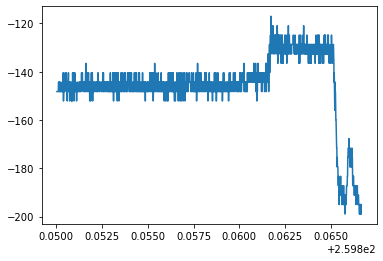

In [15]:
plt.plot(acc_data['timestamp'],acc_data['longitudinal'])

In [35]:
#Datos
sys = ["SYS", "oscar"]
dia = ["DIA", "oscar"]
mp = ["MEAN_PRESS", "oscar"]
pr = ["PULSE_RATE", "oscar"]

bp = ["BODY_POS", "equivital"]
br = ["BR", "equivital"]

lux = ["LUX", "sunsprite"]

hr = ["HR", "activitymodule"]
br2 = ["BR_RATE", "activitymodule"]
act_cnt = ["ACT_CNT", "activitymodule"]


data_sys = calculator.get_lf_feature_data(*sys)
data_dia = calculator.get_lf_feature_data(*dia)
data_mp = calculator.get_lf_feature_data(*mp)
data_pr = calculator.get_lf_feature_data(*pr)
data_bp = calculator.get_lf_feature_data(*bp)
data_br = calculator.get_lf_feature_data(*br)
data_lux = calculator.get_lf_feature_data(*lux)
data_hr = calculator.get_lf_feature_data(*hr)
data_br2 = calculator.get_lf_feature_data(*br2)
data_actcnt = calculator.get_lf_feature_data(*act_cnt)

In [34]:

data_sys, set0_sys = correct_data(data_sys)
data_dia, set0_dia = correct_data(data_dia)
data_mp, set0_mp = correct_data(data_mp)
data_pr, set0_pr = correct_data(data_pr)
data_bp, set0_bp = correct_data(data_bp)
data_br, set0_br = correct_data(data_br)
data_lux, set0_lux = correct_data(data_lux)
data_hr, set0_hr = correct_data(data_hr)
data_br2, set0_br2 = correct_data(data_br2)
data_actcnt, set0_actcnt = correct_data(data_actcnt)

In [70]:
pr_np = data_1['PULSE_RATE'].to_numpy()
pr_tim = data_1['timestamp'].to_numpy()

pr_np, pr_tim

filter(pr_np, pr_tim[0], pr_tim[1], pr_tim[-1])

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [63]:

import matplotlib.pyplot as plt
data_1, set1 = select_pp(data_pr, set0_pr, 12)
data_1 = data_1.replace(to_replace = 0, method = 'ffill')
set1 = set1['timestamp']
data_2, set2 = select_pp(data_hr, set0_hr, 12)
data_2 = data_2.replace(to_replace = 0, method = 'ffill')
set2 = set2['timestamp']

name1 = 'PULSE_RATE'
name2 = 'HR'



plot2geder(data_1['timestamp'], data_2['timestamp'], data_1[name1], data_2[name2], name1, name2, *set1, *set2, norm  = False)
#data_1['timestamp'] - data_1['timestamp'].iloc[0]

#Dejar el sistema de escalas en vez de normalizar.

#Hacer Presión arterial: br, bp, hr, actcnt

# 

# E intentar ocupar normalización para la matriz de correlación



34.0


KeyError: 0

rho,  p-value
(-0.19936855222896888, 0.08215185722584041)


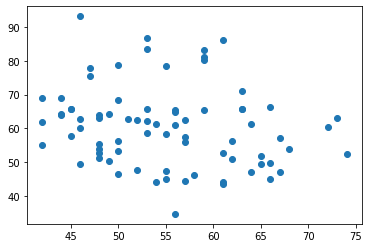

In [59]:
from scipy.stats import pearsonr as rho
data_2_ = data_2[0::round(len(data_2)/len(data_1)) + 1]
print('rho, ', 'p-value')
print(rho(data_1[name1], data_2_[name2]))
plt.scatter(data_1[name1], data_2_[name2])

#Filtrar los datos de actividad. 
#Probar correlaciones no lineales 
#corregir lo del tiempo # está listo
#revisar los sujetos sin problemas de medicion de presion, las correlaciones

#Intentar colocar los datos preprocesados a los pacientes. el nuevo sensor 'datos preprocesados'
#Buscar qué metrica utilizar para hacer la correlación 
#Intentar medir con los dos relojes al mismo tiempo.

In [ ]:
from matplotlib import pyplot as plt

for p in range(1, 19):
    #time_0 = mp_data[mp_data['participant'] == p].iloc[0]['timestamp']
    #mp_data[mp_data['participant'] == p]['timestamp'] = mp_data[mp_data['participant'] == p]['timestamp'] - time_0
    
    time_0 = mp_data[mp_data['participant'] == p].iloc[0]['timestamp']
    time_p = mp_data[mp_data['participant'] == p]['timestamp']-time_0
    plt.figure(figsize = (10,10))
    plt.plot(time_p, mp_data[mp_data['participant'] == p]['MEAN_PRESS'])
    plt.ylabel('Mean_Preassure')
    plt.xlabel('Hours')
    
plt.show()

## Plotter

Text(0.5, 0, 'Hours')

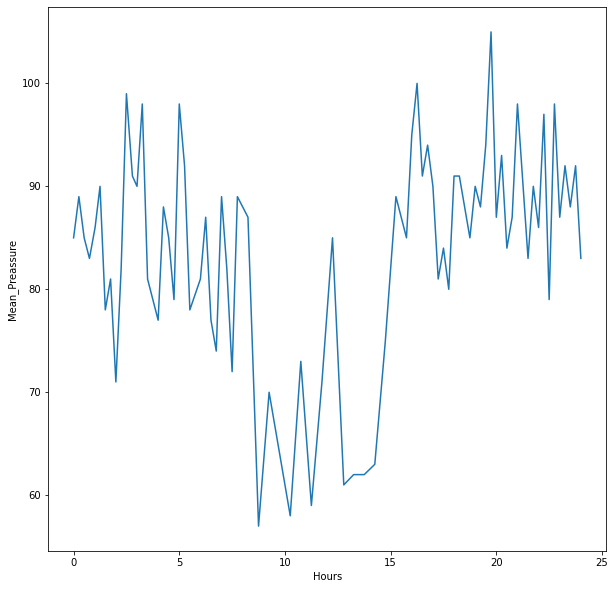

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(ff['timestamp'], ff['MEAN_PRESS'])
plt.ylabel('Mean_Preassure')
plt.xlabel('Hours')

## Pruebas

In [ ]:
dt_str = '2019-06-10T19:51:00.133000000-04:00'
tm_str1= '19:51:00.133'
tm_str2 = '19:51:10.133'

import re

def date_long2short(var):
    g = re.findall(r'\BT\d.+:\d.+:\d.+-', var)
    g = g[0]
    g = g[1:-1]   
    return g

def date2number(long_str):
    short_str = date_long2short(long_str) 
    ls = short_str.split(':')
    taim = float(ls[0]) * 3600 + float(ls[1]) * 60 + float(ls[2]) 
    return taim

def neo4jdate2number(neo4jdate_object):
    n = neo4jdate_object
    
    div = 3600

    taim = float(n.day)*24*3600+ float(n.hour) * 3600 + float(n.minute) * 60 + float(n.second)
    taim = taim/div
    return taim
#print(date2number(tm_str1))
#print(date2number(tm_str2))
print(date2number(dt_str))

col = ff['timestamp'].apply(neo4jdate2number)
ff['timestamp'] = col - col[0]